In [1]:
%run script/prep.py

# DATA IMPORT

In [2]:
data = pd.read_excel('input\\nowcasting - Timeseries Data.xlsx', sheet_name='nowcasting - Timeseries Data', 
                   header=None, index_col=0)

data.columns = [data.iloc[0], data.iloc[1]]
data = data.iloc[3:, :]
data1 = data.loc[data.index.intersection(pd.date_range('2001-1-1', '2025-3-1', freq='MS'))]
data2 = data.loc[data.index.intersection(pd.date_range('2001-1-1', '2025-3-1', freq='MS') + MonthEnd())]
data2.index = data2.index - MonthBegin()
data = pd.concat([data1.dropna(how='all', axis=1), data2.dropna(how='all', axis=1)], axis = 1)
data0 = data.astype(float)

data = pd.read_excel('input\\now - Timeseries Data.xlsx', sheet_name='now - Timeseries Data', 
                   header=None, index_col=0)

data.columns = [data.iloc[0], data.iloc[1]]
data = data.iloc[3:, :]
data1 = data.loc[data.index.intersection(pd.date_range('2001-1-1', '2025-3-1', freq='MS'))]
data2 = data.loc[data.index.intersection(pd.date_range('2001-1-1', '2025-3-1', freq='MS') + MonthEnd())]
data2.index = data2.index - MonthBegin()
data = pd.concat([data1.dropna(how='all', axis=1), data2.dropna(how='all', axis=1)], axis = 1)
data = data.astype(float)
data = pd.concat([data0, data], axis=1)

data.columns = data.columns.droplevel(level=0)
data = data.T.drop_duplicates().T

# 변수 spec

In [3]:
meta0 = pd.read_excel('input\\nowcasting - Meta Data.xlsx', sheet_name='nowcasting - Meta Data', header=0, index_col=[0, 1])
meta = pd.read_excel('input\\now - Meta Data.xlsx', sheet_name='now - Meta Data', header=0, index_col=[0, 1])
meta = pd.concat([meta0, meta], axis=0)

In [4]:
# 모형 포함 여부, 블록 1/2/3/4, 변환 방식, 변수 카테고리, 계절조정 여부
columns = ['ID', 'Model', 'Block1-Global', 'Block2-Soft', 'Block3-Real', 'Block4-Labor', 'Transformation', 'Category', 'sa']

## Labor

In [5]:
### 취업자수
meta.loc['KOSIS-101_DT_1DA9001S-M-T30-00-14STD06156', columns] = ['LEM', 1, 1, 0, 0, 1, 'chg', 'labor', 1]
### 실업률
meta.loc['KOSIS-101_DT_1DA9001S-M-T80-00-14STD00018', columns] = ['LUN', 1, 1, 0, 0, 1, 'chg', 'Labor', 1]
### 고용률
meta.loc['KOSIS-101_DT_1DA7001S-M-T90-0-14STD00018', columns] = ['LER', 1, 1, 0, 0, 1, 'chg', 'Labor', 0]
### 구직배수
meta.loc['ENARA-JOBSEEK-T03-%-M', columns] = ['LOM', 1, 1, 0, 0, 1, 'chg', 'Labor', 0]
### 취업률
meta.loc['ENARA-JOBSEEK-T05-%-M', columns] = ['LOR', 1, 1, 0, 0, 1, 'chg', 'Labor', 0]
labor = ['LEM', 'LUN', 'LER', 'LOM', 'LOR']

## National Accounts

In [6]:
na = ['NAG', 'NAP', 'NAF', 'NAC', 'NAE']
### 국내총생산 증가율, 실질, 전기대비
meta.loc['ECOS-111U055-10111-QQ', columns] = ['NAG', 1, 1, 0, 1, 0, 'raw', 'National Accounts', 1]
### 민간소비 증가율, 실질, 전기대비
meta.loc['ECOS-111U055-10122-QQ', columns] = ['NAP', 1, 1, 0, 1, 0, 'raw', 'National Accounts', 1]
### 설비투자 증가율, 실질, 전기대비
meta.loc['ECOS-111U055-10123-QQ', columns] = ['NAF', 1, 1, 0, 1, 0, 'raw', 'National Accounts', 1]
### 건설투자 증가율, 실질, 전기대비
meta.loc['ECOS-111U055-10124-QQ', columns] = ['NAC', 1, 1, 0, 1, 0, 'raw', 'National Accounts', 1]
### 재화수출 증가율, 실질, 전기대비
meta.loc['ECOS-111U055-10125-QQ', columns] = ['NAE', 1, 1, 0, 1, 0, 'raw', 'National Accounts', 1]

## Prices

In [7]:
price = ['CPI', 'PPI', 'CPI1', 'CPI2']
### CPI
meta.loc['ECOS-021U125-MM-0', columns] = ['CPI', 1, 1, 0, 0, 0, 'pch', 'Prices', 0]
### 생산자 물가지수
meta.loc['ECOS-013U202-MM-*AA', columns] = ['PPI', 1, 1, 0, 0, 0, 'pch', 'Prices', 0]
### 농산물 석유, 식료품 에너지 제외 지수
meta.loc['KOSIS-101_DT_1J17007-M-T10-QB-14691_BSM00033', columns] = ['CPI1', 1, 1, 0, 0, 0, 'pch', 'Prices', 0]
meta.loc['KOSIS-101_DT_1J17009-M-T10-DB-14691_BSM00033', columns] = ['CPI2', 1, 1, 0, 0, 0, 'pch', 'Prices', 0]

## 제조업

In [8]:
mfg = ['MDS', 'MPI', 'MII', 'MIC', 'MIM', 'MIF', 'MSI', 'MSC', 'MSM', 'MSF', 'MUI', 'MFI']
### 내구재 판매액지수
meta.loc['KOSIS-101_DT_1K31012-M-T3-G1-14691_BSM00033', columns] = ['MDS', 1, 1, 0, 1, 0, 'pch', 'Manufacturing', 0]

### 제조업 생산지수
meta.loc['KOSIS-101_DT_1F01501-M-T20-00-C-14691_BSM00033', columns] = ['MPI', 1, 1, 0, 1, 0, 'pch', 'Manufacturing', 1]

### 제조업 재고지수
meta.loc['KOSIS-101_DT_1F01501-M-T22-00-C-14691_BSM00033', columns] = ['MII', 1, 1, 0, 1, 0, 'pch', 'Manufacturing', 1]

### 제조업 재고지수, 자본재
meta.loc['KOSIS-101_DT_1F01503-M-T22-00-1-14691_BSM00033', columns] = ['MIC', 1, 1, 0, 1, 0, 'pch', 'Manufacturing', 1]

### 제조업 재고지수, 중간재
meta.loc['KOSIS-101_DT_1F01503-M-T22-00-2-14691_BSM00033', columns] = ['MIM', 1, 1, 0, 1, 0, 'pch', 'Manufacturing', 1]

### 제조업 재고지수, 소비재
meta.loc['KOSIS-101_DT_1F01503-M-T22-00-3-14691_BSM00033', columns] = ['MIF', 1, 1, 0, 1, 0, 'pch', 'Manufacturing', 1]

### 제조업 출하지수
meta.loc['KOSIS-101_DT_1F01501-M-T21-00-C-14691_BSM00033', columns] = ['MSI', 1, 1, 0, 1, 0, 'pch', 'Manufacturing', 1]

### 제조업 출하지수, 자본재
meta.loc['KOSIS-101_DT_1F01503-M-T21-00-1-14691_BSM00033', columns] = ['MSC', 1, 1, 0, 1, 0, 'pch', 'Manufacturing', 1]

### 제조업 출하지수, 중간재
meta.loc['KOSIS-101_DT_1F01503-M-T21-00-2-14691_BSM00033', columns] = ['MSM', 1, 1, 0, 1, 0, 'pch', 'Manufacturing', 1]

### 제조업 출하지수, 소비재
meta.loc['KOSIS-101_DT_1F01503-M-T21-00-3-14691_BSM00033', columns] = ['MSF', 1, 1, 0, 1, 0, 'pch', 'Manufacturing', 1]

### 제조업 가동률 지수
meta.loc['KOSIS-101_DT_1F31501-M-T30-C-14691_BSM00033', columns] = ['MUI', 1, 1, 0, 1, 0, 'chg', 'Manufacturing', 1]

### 설비투자 지수
meta.loc['KOSIS-101_DT_1F70011-M-T5-C-14691_BSM00033', columns] = ['MFI', 1, 1, 0, 1, 0, 'chg', 'Manufacturing', 1]

## 소매 및 소비

In [9]:
retail = ['RSI', 'IPS', 'IPM', 'IPC']
### 소매 판매액 지수
meta.loc['KOSIS-101_DT_1K31012-M-T3-G0-14691_BSM00033', columns] = ['RSI', 1, 1, 0, 1, 0, 'pch', 'Retail and Consumption', 0]

### 전산업생산지수 서비스업
meta.loc['KOSIS-101_DT_1JH20152-M-T1-1C-14691_BSM00033', columns] = ['IPS', 1, 1, 0, 1, 0, 'pch', 'Retail and Consumption', 0]

### 전산업생산지수 광공업
meta.loc['KOSIS-101_DT_1JH20152-M-T1-1B-14691_BSM00033', columns] = ['IPM', 1, 1, 0, 1, 0, 'pch', 'Retail and Consumption', 0]

### 전산업생산지수 건설업
meta.loc['KOSIS-101_DT_1JH20152-M-T1-1D-14691_BSM00033', columns] = ['IPC', 1, 1, 0, 1, 0, 'pch', 'Housing and Construction', 0]

## 주택 및 건설

In [10]:
house = ['HST', 'HCP', 'HPM']
### 주택착공실적
meta.loc['KOSIS-116_DT_MLTM_5386-M-13103766971T1-13102766971A_0001-13102766971B_0001-13102766971C_0001-14STD06712', 
         columns] = ['HST', 1, 1, 0, 1, 0, 'pch', 'Housing and Construction', 0]

### 건설기성액
meta.loc['KOSIS-101_DT_1G18012-M-T1-0-14STD05057', columns] = ['HCP', 1, 1, 0, 1, 0, 'pch', 'Housing and Construction', 0]

### 주택건설 인허가실적
meta.loc['MOLIT-HOUSE_PERMIT-KR_00-T1-UT-M', columns] = ['HPM', 1, 1, 0, 1, 0, 'pch', 'Housing and Construction', 0]

## International Trade

In [11]:
trade = ['BGI', 'BSX', 'BGX', 'BSI', 'BBX', 'BBI', 'BIP', 'BXP']
### 수출입
meta.loc['ECOS-022U113-MM-SA120', columns] = ['BGI', 1, 1, 0, 1, 0, 'pch', 'International Trade', 1] # 상품수입
meta.loc['ECOS-022U113-MM-SA210', columns] = ['BSX', 1, 1, 0, 1, 0, 'pch', 'International Trade', 1] # 서비스수입
meta.loc['ECOS-022U113-MM-SA110', columns] = ['BGX', 1, 1, 0, 1, 0, 'pch', 'International Trade', 1] # 상품수출
meta.loc['ECOS-022U113-MM-SA220', columns] = ['BSI', 1, 1, 0, 1, 0, 'pch', 'International Trade', 1] # 서비스지급

### bloomberg
meta.loc['BBG-BBG-KOEXTOT_Index', columns] = ['BBX', 1, 1, 0, 1, 0, 'pch', 'International Trade', 1] # export
meta.loc['BBG-BBG-KOIMTOT_Index', columns] = ['BBI', 1, 1, 0, 1, 0, 'pch', 'International Trade', 1] # import

### 수입물가지수, 수출물가지수
meta.loc['ECOS-018U301-MM-*AA-W', columns] = ['BIP', 1, 1, 0, 0, 0, 'pch', 'International Trade', 0]
meta.loc['ECOS-019U301-MM-*AA-W', columns] = ['BXP', 1, 1, 0, 0, 0, 'pch', 'International Trade', 0]

### 서베이

In [12]:
survey = ['SCS', 'SCB', 'SES', 'SAS', 'SAB', 'SMO', 'SMF', 'SMU', 'SMB', 'SMX', 'SMD']
### 소비자동향조사, 소비자심리지수
meta.loc['KOSIS-301_DT_040Y002-M-13103112548999-13102112548CSI_CODE_FME-13102112548CSI_PART_99988', 
         columns] = ['SCS', 1, 1, 1, 0, 0, 'lin', 'Surveys', 0]
### 소비자동향조사, 현재경기판단CSI
meta.loc['KOSIS-301_DT_040Y002-M-13103112548999-13102112548CSI_CODE_FMAB-13102112548CSI_PART_99988', 
         columns] = ['SCB', 1, 1, 1, 0, 0, 'lin', 'Surveys', 0]
### 경제심리지수, 순환변동치
meta.loc['ECOS-042U001-MM-E2000', columns] = ['SES', 1, 1, 1, 0, 0, 'lin', 'Surveys', 0]

### 기업경기실사지수
### 전산업 매출 실적
meta.loc['ECOS-041U013-MM-99988-AB', columns] = ['SAS', 1, 1, 0, 1, 0, 'chg', 'Surveys', 1]
### 전산업 업황 실적
meta.loc['ECOS-041U013-MM-99988-AA', columns] = ['SAB', 1, 1, 0, 1, 0, 'chg', 'Surveys', 1]
### 제조업 신규수주 실적
meta.loc['ECOS-041U013-MM-C0000-AD', columns] = ['SMO', 1, 1, 0, 1, 0, 'chg', 'Surveys', 1]
### 제조업 설비투자 실적
meta.loc['ECOS-041U013-MM-C0000-AI', columns] = ['SMF', 1, 1, 0, 1, 0, 'chg', 'Surveys', 1]
### 제조업 가동률 실적
meta.loc['ECOS-041U013-MM-C0000-AK', columns] = ['SMU', 1, 1, 0, 1, 0, 'chg', 'Surveys', 1]
### 제조업 업황 실적
meta.loc['ECOS-041U013-MM-C0000-AS', columns] = ['SMB', 1, 1, 0, 1, 0, 'chg', 'Surveys', 1]
### 제조업 수출 실적
meta.loc['ECOS-041U013-MM-C0000-AM', columns] = ['SMX', 1, 1, 0, 1, 0, 'chg', 'Surveys', 1]
### 제조업 내수판매 실적
meta.loc['ECOS-041U013-MM-C0000-AL', columns] = ['SMD', 1, 1, 0, 1, 0, 'chg', 'Surveys', 1]

In [13]:
total = survey + trade + house + retail + mfg + price + na + labor

In [14]:
meta = meta.loc[meta.Model.eq(1), :].drop_duplicates()
ids = meta.reset_index().set_index('Series ID')[['ID']]
mdata = pd.concat([data.T, meta.reset_index().set_index('Series ID')[['ID']]], axis=1)
mdata = mdata.set_index('ID', append=True)
mdata.index.names = ['Series ID', 'ID']
mdata = mdata.T
mdata.columns = mdata.columns.droplevel(level=0)
mdata = mdata[ids.ID.tolist()]
mdata.index = pd.to_datetime(mdata.index)
mdata = mdata.loc['2003':, :]

In [15]:
mdata[labor]

ID,LEM,LUN,LER,LOM,LOR
2003-01-01,"22,224.50",3.30,58.10,0.51,17.10
2003-02-01,"22,201.60",3.30,57.90,0.62,19.60
2003-03-01,"22,152.70",3.40,58.70,0.55,22.60
2003-04-01,"22,100.50",3.40,59.60,0.59,25.00
2003-05-01,"22,131.40",3.60,60.10,0.57,24.40
...,...,...,...,...,...
2020-11-01,"26,960.00",4.20,60.70,0.51,27.10
2020-12-01,"26,783.20",4.50,59.10,0.37,18.70
2021-01-01,"26,485.10",5.40,57.40,0.29,15.30
2021-02-01,nan,nan,nan,0.46,24.90


<AxesSubplot:>

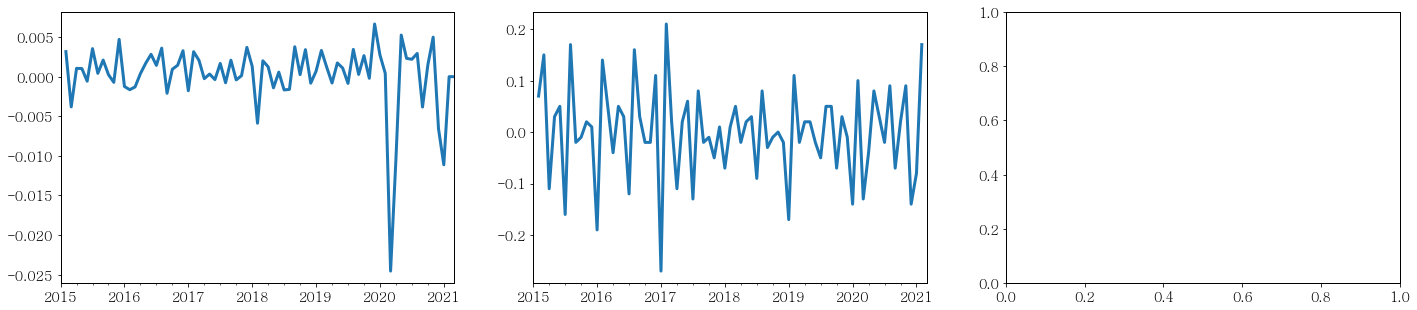

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(24, 5))

mdata[labor].loc['2015':, 'LEM'].pct_change().plot(ax=axs[0])
#mdata[labor]['LUN'].diff().plot(ax=axs[1])
mdata[labor].loc['2015':, 'LOM'].diff().plot(ax=axs[1])
#mdata[labor]['LOR'].plot(ax=axs[2])

In [25]:
mdata[survey]

ID,SCS,SCB,SES,SAS,SAB,SMO,SMF,SMU,SMB,SMX,SMD
2003-01-01,nan,nan,96.70,89.00,82.00,90.00,97.00,96.00,83.00,91.00,88.00
2003-02-01,nan,nan,96.50,81.00,73.00,87.00,95.00,93.00,78.00,91.00,87.00
2003-03-01,nan,nan,96.30,78.00,71.00,84.00,90.00,92.00,73.00,87.00,83.00
2003-04-01,nan,nan,96.40,82.00,76.00,87.00,89.00,92.00,74.00,92.00,83.00
2003-05-01,nan,nan,96.80,78.00,74.00,81.00,88.00,89.00,74.00,84.00,81.00
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-01,99.00,72.00,87.00,76.00,78.00,83.00,91.00,88.00,83.00,80.00,83.00
2020-12-01,91.20,56.00,89.70,74.00,75.00,84.00,89.00,84.00,80.00,79.00,81.00
2021-01-01,95.40,56.00,92.40,78.00,77.00,88.00,93.00,91.00,84.00,87.00,88.00
2021-02-01,97.40,63.00,95.10,81.00,76.00,90.00,93.00,93.00,83.00,93.00,92.00


<AxesSubplot:>

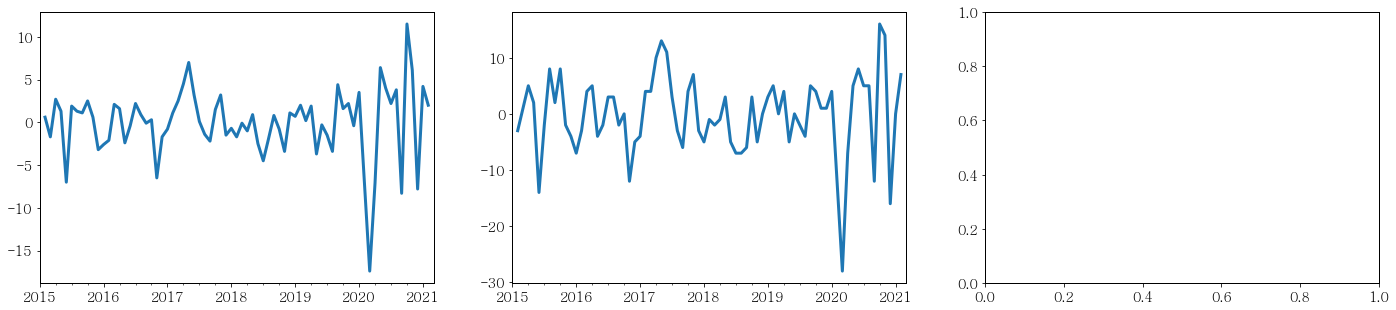

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(24, 5))

mdata[survey].loc['2015':, 'SCS'].diff().plot(ax=axs[0])
#mdata[survey]['LUN'].diff().plot(ax=axs[1])
mdata[survey].loc['2015':, 'SCB'].diff().plot(ax=axs[1])
#mdata[survey]['LOR'].plot(ax=axs[2])

In [29]:
mdata[na]

ID,NAG,NAP,NAF,NAC,NAE
2003-01-01,-0.70,-0.90,-0.30,2.70,0.40
2003-02-01,nan,nan,nan,nan,nan
2003-03-01,nan,nan,nan,nan,nan
2003-04-01,-0.20,-0.60,-2.30,-0.10,1.70
2003-05-01,nan,nan,nan,nan,nan
...,...,...,...,...,...
2020-11-01,nan,nan,nan,nan,nan
2020-12-01,nan,nan,nan,nan,nan
2021-01-01,nan,nan,nan,nan,nan
2021-02-01,nan,nan,nan,nan,nan


<AxesSubplot:>

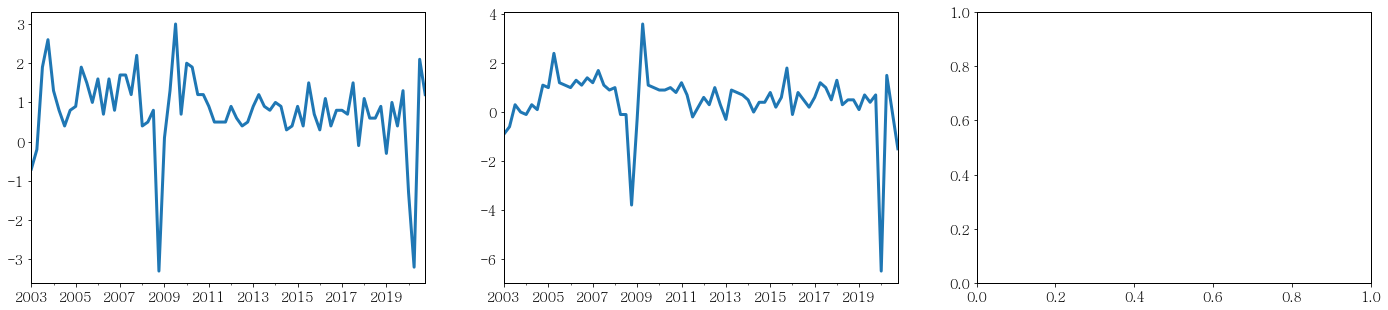

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(24, 5))

mdata[na].dropna().loc[:, 'NAG'].plot(ax=axs[0])
#mdata[na]['LUN'].diff().plot(ax=axs[1])
mdata[na].dropna().loc[:, 'NAP'].plot(ax=axs[1])
#mdata[na]['LOR'].plot(ax=axs[2])

In [ ]:
!pip install statsmodels

In [ ]:
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(mdata[labor]['LOR'].dropna())

res.plot()



## 통화금리

In [ ]:
m1 = ecos('054Y408', 'ABA1', freq='M', col='m1')
# m1 = ecos('054Y407', 'ABA2', freq='M', col='m1')
m2 = ecos('001Y407', 'BBHS00', freq='M', col='m2')
# m2 = ecos('001Y406', 'BBGS00', freq='M', col='m2)
lf = ecos('075Y402', 'LAS0000', freq='M', col='lf')
# lf = ecos('075Y401', 'LES0000', freq='M', col='lf')

call = ecos('028Y001', 'BEEA11', freq='M', col='call')

ms1 = ecos('028Y001', 'BEEA43', freq='M', col='ms1')

ms2 = ecos('028Y001', 'BEEA44', freq='M', col='ms2')

mss2_1 = ms2.sub(ms1.ms1, axis=0)

aa3 = ecos('028Y001', 'BEEA472', freq='M', col='aa3')

tb1 = ecos('028Y001', 'BEEA411', freq='M', col='tb1')

tb3 = ecos('028Y001', 'BEEA42', freq='M', col='tb3')

tb5 = ecos('028Y001', 'BEEA421', freq='M', col='tb5')

tb10 = ecos('028Y001', 'BEEA422', freq='M', col='tb10')

tbs10_1 = tb10.sub(tb1.tb1, axis=0)

tbs5_1 = tb5.sub(tb1.tb1, axis=0)

tbs3_1 = tb3.sub(tb1.tb1, axis=0)

cs3 = tb3.tb3.sub(aa3.aa3, axis=0).to_frame('cs3')

bd = ecos('001Y048', '1000000', freq='M', col='bd')

# bd = ecos('001Y011', 'BDAA1', freq='M', col='bd')

bl = ecos('001Y012', 'BDCA1', freq='M', col='bd')   # 평잔 없음